In [1]:
from RAT_env import *
from NashAgent_lib import *
from NashRL import *
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import csv


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-6eb2teu5 because the default path (/home/ubuntu/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Initialize enviroment for the training

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


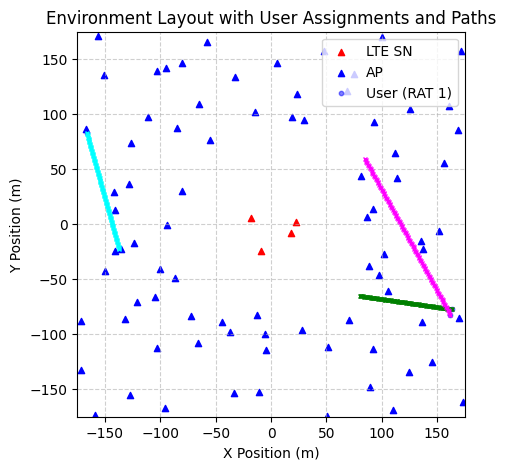

In [2]:
# Parameters for the Multi-RAT Network
user_area_width = 100
ltesn_area_width = 50
n_aps = 81
n_users = 3
n_steps = 100
cqi_dataset = pd.read_csv("cqi_distance.csv")
rssi_dataset = pd.read_csv("rssi_distance.csv")

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

rat_env = Multi_RAT_Network(user_area_width, ltesn_area_width, n_users, n_aps, cqi_dataset, rssi_dataset, n_steps, plot=True)

Train the Nash Agent

In [ ]:
import time
from datetime import date

start = time.time()

str_dt = date.today().strftime("%d%m%Y")
nash_agent, loss_data, last_rats, episode_rewards, best_actions,eps_list= \
    run_Nash_Agent(rat_env, n_steps=100, nash_agent=None, n_episodes=4000,#4000
                    exploration_fraction = 0.8,AN_file_name="Action_Net",
                    VN_file_name="Value_Net",rv_min=1, rv_max=10,
                    path='/pt_files/Nash_DQN/',early_stop=False, early_lim=1000)

print("Total time taken: ")
print(time.time() - start)

Iteration 0 Loss: 1778011340800.0 | V_Loss: 1778076876800.0 | A_Loss: 1778011340800.0
tensor([10.4451, 10.3831, 10.4264]) tensor([-24.0235,  34.0624,   5.9726])
tensor([10.4862, 10.4314, 10.4129]) tensor([ 9.4874, 23.3436, 16.2987])
tensor([10.5925, 10.3921, 10.4213]) tensor([ -3.9873,  -1.7954, -44.6316])
tensor([10.3969, 10.5085, 10.3763]) tensor([ 25.8069, -47.9292, -57.4992])
tensor([10.3787, 10.3915, 10.4962]) tensor([11.2799,  1.4981, 10.5639])
tensor([10.4182, 10.2705, 10.3581]) tensor([22.8459, -1.8582, 23.0098])
tensor([10.4456, 10.4345, 10.3989]) tensor([12.5066,  7.1111, 12.6413])
tensor([10.4147, 10.3773, 10.4396]) tensor([ 4.9664, 22.0538, 25.5935])
tensor([10.3604, 10.3980, 10.4280]) tensor([15.6534,  3.6718,  5.9115])
tensor([10.3042, 10.4200, 10.4928]) tensor([ 6.5052, 16.7675, 12.3003])
tensor([10.3736, 10.3644, 10.4348]) tensor([ -5.8434,   0.1303, -12.4383])
tensor([10.3022, 10.4386, 10.3636]) tensor([6.0318, 3.7962, 9.1235])
tensor([10.3079, 10.3949, 10.3833]) tenso

tensor([10.6115, 10.5304, 10.6015]) tensor([16.2123,  7.4746,  4.0328])
tensor([10.6892, 10.6571, 10.5393]) tensor([22.0521, 14.3542,  5.4614])
tensor([10.4702, 10.5999, 10.6699]) tensor([8.7263, 1.7677, 3.1333])
tensor([10.6261, 10.5300, 10.5415]) tensor([ 8.3552, 14.1644, 11.2316])
tensor([10.6608, 10.5560, 10.7846]) tensor([6.9557, 7.9649, 7.3167])
tensor([10.8222, 10.9164, 11.0529]) tensor([ 9.0090, 11.8777, 27.4319])
tensor([10.9522, 10.9787, 11.0376]) tensor([13.9039, -6.0421,  4.9768])
tensor([10.9465, 10.7213, 10.7820]) tensor([16.6613, 13.5519,  8.9424])
tensor([12.6364, 11.0617, 10.5800]) tensor([14.9132, -3.8155, 12.1154])
tensor([11.2389, 10.9953, 11.2170]) tensor([15.7585, 22.6011,  4.1501])
tensor([10.9504, 10.7955, 11.0784]) tensor([ 3.9331, 21.7309, 13.6262])
tensor([10.7110, 11.1599, 11.0450]) tensor([ 8.2283, 17.8231, 10.1130])
tensor([11.7205, 11.4022, 11.0806]) tensor([17.1651, -3.9203, -8.6131])
tensor([12.2637, 11.1170, 11.1978]) tensor([14.0116,  9.5724, 20.8816]

In [ ]:
plt.figure(figsize=(8, 5)) 

plt.plot(loss_data, label="Loss", color="blue", linewidth=2, marker="o", markersize=4)

plt.ylim(np.min(loss_data) * 0.9, np.max(loss_data) * 1.1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

min_idx = np.argmin(loss_data)
max_idx = np.argmax(loss_data)

plt.scatter([min_idx, max_idx], [loss_data[min_idx], loss_data[max_idx]], color="red", zorder=3)
plt.annotate(f"Min: {loss_data[min_idx]:.2f}", (min_idx, loss_data[min_idx]), 
             textcoords="offset points", xytext=(5, -10), ha="left", color="red")
plt.annotate(f"Max: {loss_data[max_idx]:.2f}", (max_idx, loss_data[max_idx]), 
             textcoords="offset points", xytext=(5, 10), ha="left", color="red")

plt.show()


In [ ]:
steps = []
rewards = [[] for _ in range(n_users)]

with open('rewards.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        steps.append(int(row["step"]) + 1)
        for j in range(n_users):
            rewards[j].append(float(row[f"reward_{j+1}"]))

plt.figure(figsize=(12, 8))

agents_plotted = n_users
for j in range(agents_plotted):
    plt.plot(steps, rewards[j], label=f"Reward {j+1}")
    
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.title("Reward per step for Each Agent")
plt.legend()
plt.grid()
plt.show()

In [ ]:
episode_rewards = np.array(episode_rewards)

# Calculate the average reward across all agents for each episode
average_rewards = np.mean(episode_rewards, axis=1)

plt.figure(figsize=(12, 8))

# Plot the average reward per episode across all agents
plt.plot(range(episode_rewards.shape[0]), average_rewards, label="Average Reward")

plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Average Reward per Episode Across All Agents")
plt.legend()
plt.grid()
plt.show()

Reward for each agent

In [ ]:
steps = []
rewards = [[] for _ in range(n_users)]  # Adjusting to 20 agents

# Read rewards data from the CSV file
with open('rewards.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        steps.append(int(row["step"]) + 1)
        for j in range(n_users):  # Loop over 20 agents
            rewards[j].append(float(row[f"reward_{j+1}"]))

# Create a 5x4 grid of subplots for 20 agents
fig, axes = plt.subplots(5, 4, figsize=(15, 15))
fig.tight_layout(pad=5.0)  # Add space between plots

# Flatten the 2D axes array to make it easier to loop through
axes = axes.flatten()

# Plot rewards for each agent in its own subplot
for j in range(n_users):
    ax = axes[j]
    ax.plot(steps, rewards[j])
    ax.set_title(f"Agent {j+1}")
    ax.set_xlabel("Steps")
    ax.set_ylabel("Reward")
    ax.grid(True)

plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(range(len(last_rats)), last_rats, edgecolor='black')


plt.xlabel('Index')
plt.xticks(range(len(last_rats))) 
plt.ylabel('Value')
plt.title('Bar Plot of Rat Values')



In [ ]:
plt.figure(figsize=(12, 6))

plt.bar(range(len(last_rats)), best_actions, edgecolor='black')
plt.xlabel('Index')
plt.xticks(range(len(best_actions))) 
plt.ylabel('Value')
plt.title('Oupput Values of the NN')

plt.show()

In [ ]:
plt.plot(range(len(eps_list)),eps_list)
plt.ylabel('epsilon')
plt.show()
plt.close()